<b>
<p>
<center>
<font size="5">
Machine Learning Final Project
</font>
</center>
</p>

<p>
<center>
<font size="4">
What factors are important in detecting a stroke?
</font>
</center>
</p>
    

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Fardin Hafiz
</font>
</center>
</p>
</b>

# Introduction

The purpose of this project was to evaluate what factors are important in determining if a patient will have a stroke.A stroke is when blood circulation is cut of to the brain causing a patient's body to shut down due to low blood to the brain. This is a very serious ailment that can lead to death. There are certain factors that can help determine the patients likelihood in having a stroke. To determine which factors are more common in stroke patients this machine learning project was done. The dataset used was a Stroke Prediction dataset that had thousands of patient information and reported if they had a stroke. The problem that is trying to be solved through this project is , "could we use machine learning methods to gain a better understanding of potential factors that play a role in a person getting a stroke?". The motivation behind this study is the large amount of strokes that happen worldwide. According to the WHO , strokes are the 2nd largest cause of death worldwide. This is a very common affliction that requires attention and study. If the factors of a stroke can be highlighted, those who are highly susceptible to these factors can see the importance and take action in order to preemptively reduce stroke risks. A real-world dataset was used to draw actual conclusions about a problem people are facing.

# Notebook Configuration

## Google drive

In [ ]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = "/content/drive/My Drive/Colabs Notebook/MachineLearning/FinalProject/"

# Get the absolute path of the shallow utilities folder
abspath_util_shallow = "/content/drive/My Drive/Colabs Notebook/MachineLearning/Utilities/"

# Get the absolute path of the shallow models folder
abspath_model_shallow = "/content/drive/My Drive/Colabs Notebook/MachineLearning/Models/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Warning

In [ ]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [ ]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## Random seed

In [ ]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

In [ ]:
# Change working directory to the absolute path of the shallow utilities folder
%cd $abspath_util_shallow

# Import the shallow utitilities
%run pmlm_utilities_shallow.ipynb

/content/drive/My Drive/Colabs Notebook/MachineLearning/Utilities


In [ ]:
# Implement me
import pandas as pd
from sklearn.model_selection import train_test_split

# Get the name of the target
target = 'stroke'

df = pd.read_csv(abspath_curr + 'healthcare-dataset-stroke-data.csv')

df_train, df_test = train_test_split(df,train_size=0.8,random_state=42,stratify=df[target])



In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,4088,12


In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,1022,12


In [ ]:
from sklearn.model_selection import train_test_split

# Divide the training data into training (80%) and validation (20%)
df_train, df_val = train_test_split(df_train, train_size=0.8, random_state=random_seed)

# Reset the index
df_train, df_val = df_train.reset_index(drop=True), df_val.reset_index(drop=True)

In [ ]:
df_common_var = common_var_checker(df_train, df_val, df_test, target)
df_common_var

,common var
0,Residence_type
1,age
2,avg_glucose_level
3,bmi
4,ever_married
5,gender
6,heart_disease
7,hypertension
8,id
9,smoking_status


In [ ]:
# Get the features in the training data but not in the validation or test data
uncommon_feature_train_not_val_test = np.setdiff1d(df_train.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_train_not_val_test, columns=['uncommon feature'])

,uncommon feature


In [ ]:
# Get the features in the validation data but not in the training or test data
uncommon_feature_val_not_train_test = np.setdiff1d(df_val.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_val_not_train_test, columns=['uncommon feature'])

,uncommon feature


In [ ]:
# Get the features in the test data but not in the training or validation data
uncommon_feature_test_not_train_val = np.setdiff1d(df_test.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_test_not_train_val, columns=['uncommon feature'])

,uncommon feature


In [ ]:
# Remove the uncommon features from the validation data
df_val = df_val.drop(columns=uncommon_feature_val_not_train_test)

# Remove the uncommon features from the test data
df_test = df_test.drop(columns=uncommon_feature_test_not_train_val)

# Remove the uncommon features from the training data
df_train = df_train.drop(columns=uncommon_feature_train_not_val_test)

In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

# Call id_checker on df
# See the implementation in pmlm_utilities.ipynb
df_id = id_checker(df)

# Print the first 5 rows of df_id
df_id.head()

,id
0,27849
1,18891
2,41404
3,42305
4,70122


In [ ]:
import numpy as np

# Remove identifiers from df_train
df_train.drop(columns=np.intersect1d(df_id.columns, df_train.columns), inplace=True)

# Remove identifiers from df_val
df_val.drop(columns=np.intersect1d(df_id.columns, df_val.columns), inplace=True)

# Remove identifiers from df_test
df_test.drop(columns=np.intersect1d(df_id.columns, df_test.columns), inplace=True)

In [ ]:
# Get the date time variables
datetime_vars = []

# Call datetime_transformer on df_train
df_train = datetime_transformer(df_train, datetime_vars)

# Call datetime_transformer on df_val
df_val = datetime_transformer(df_val, datetime_vars)

# Call datetime_transformer on df_test
df_test = datetime_transformer(df_test, datetime_vars)

In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

# Call nan_checker on df
df_nan = nan_checker(df)

# Print df_nan
df_nan



,var,proportion,dtype
0,bmi,0.039335,float64


In [ ]:
# Print the unique data type of variables with NaN
pd.DataFrame(df_nan['dtype'].unique(), columns=['dtype'])

,dtype
0,float64


In [ ]:
# Get the variables with missing values, their proportion of missing values and data type
df_miss = df_nan[df_nan['dtype'] == 'float64'].reset_index(drop=True)

# Print df_miss
df_miss

,var,proportion,dtype
0,bmi,0.039335,float64


In [ ]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [ ]:
from sklearn.impute import SimpleImputer

# If there are missing values
if len(df_miss['var']) > 0:
    # The SimpleImputer
    si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

    # Impute the variables with missing values in df_train, df_val and df_test
    df_train[df_miss['var']] = si.fit_transform(df_train[df_miss['var']])
    df_val[df_miss['var']] = si.transform(df_val[df_miss['var']])
    df_test[df_miss['var']] = si.transform(df_test[df_miss['var']])

In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

# Print the unique data type of variables in df
pd.DataFrame(df.dtypes.unique(), columns=['dtype'])

,dtype
0,float64
1,int64
2,bool


In [ ]:
# Call cat_var_checker on df
# See the implementation in pmlm_utilities.ipynb
df_cat = cat_var_checker(df)

# Print the dataframe
df_cat

,var,nunique


In [ ]:
# One-hot-encode the categorical features in the combined data
df = pd.get_dummies(df, columns=np.setdiff1d(np.intersect1d(df.columns, df_cat['var']), [target]))

# Print the first 5 rows of df
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Residence_type_Rural,Residence_type_Urban,ever_married_No,ever_married_Yes,...,gender_Other,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,5.0,0,0,122.25,16.7,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
1,24.0,0,0,99.65,50.3,0,True,False,True,False,...,False,False,False,True,False,True,False,False,False,False
2,37.0,0,0,110.28,22.3,0,True,False,False,True,...,False,False,False,True,False,False,False,True,False,False
3,41.0,0,0,100.75,27.2,0,True,False,True,False,...,False,False,False,True,False,False,False,True,False,False
4,29.0,0,0,72.52,33.9,0,True,False,False,True,...,False,False,False,True,False,False,False,True,False,False


In [ ]:
from sklearn.preprocessing import LabelEncoder

# The LabelEncoder
le = LabelEncoder()

# Encode categorical target in the combined data
df[target] = le.fit_transform(df[target].astype(str))

# Print the first 5 rows of df
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Residence_type_Rural,Residence_type_Urban,ever_married_No,ever_married_Yes,...,gender_Other,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,5.0,0,0,122.25,16.7,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
1,24.0,0,0,99.65,50.3,0,True,False,True,False,...,False,False,False,True,False,True,False,False,False,False
2,37.0,0,0,110.28,22.3,0,True,False,False,True,...,False,False,False,True,False,False,False,True,False,False
3,41.0,0,0,100.75,27.2,0,True,False,True,False,...,False,False,False,True,False,False,False,True,False,False
4,29.0,0,0,72.52,33.9,0,True,False,False,True,...,False,False,False,True,False,False,False,True,False,False


In [ ]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [ ]:
# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

In [ ]:
from sklearn.preprocessing import StandardScaler

# The StandardScaler
ss = StandardScaler()

# Standardize the training data
X_train = ss.fit_transform(X_train)

# Standardize the validation data
X_val = ss.transform(X_val)

# Standardize the test data
X_test = ss.transform(X_test)

# Hyperparameter Tuning

In [ ]:
# Implement me
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

models = {'lr': LogisticRegression(class_weight='balanced', random_state=random_seed),
          'mlpc': MLPClassifier(early_stopping=True, random_state=random_seed),
          'rfc': RandomForestClassifier(class_weight='balanced', random_state=random_seed),
          'hgbc': HistGradientBoostingClassifier(random_state=random_seed)}

In [ ]:
from sklearn.pipeline import Pipeline

from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

In [ ]:
# Get the:
# feature matrix and target velctor in the combined training and validation data
# target vector in the combined training and validation data
# PredefinedSplit
X_train_val, y_train_val, ps = get_train_val_ps(X_train, y_train, X_val, y_val)

In [ ]:
param_grids = {}

# The grids for alpha
alpha_grids = [1e-6, 3e-6, 1e-5, 3e-5, 1e-4]

# The grids for learning_rate_init
learning_rate_init_grids = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2]

param_grids['mlpc'] = [{
    'model__alpha': alpha_grids,
    'model__learning_rate_init': learning_rate_init_grids,
    'model__hidden_layer_sizes': [(50,), (100,), (100, 50), (50, 50), (64, 32)],
    'model__activation': ['relu', 'tanh'],
    'model__solver': ['adam'],
    'model__batch_size': ['auto', 32, 64]
}]

# The parameter grid of tol
tol_grid = [10 ** -5, 10 ** -4, 10 ** -3]

# The parameter grid of C
C_grid = [0.1, 1, 10]

# Update param_grids
param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]

# The grids for min_samples_split
min_samples_split_grids = [2, 20, 100]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100]

# Update param_grids
param_grids['rfc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

# The grids for learning_rate
learning_rate_grids = [10 ** i for i in range(-3, 2)]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100]

# Update param_grids
param_grids['hgbc'] = [{'model__learning_rate': learning_rate_grids,
                        'model__min_samples_leaf': min_samples_leaf_grids}]

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/submission/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [ ]:
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)

    # Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)

    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])

    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])

    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score',
                         'std_test_score',
                         'mean_train_score',
                         'std_train_score',
                         'mean_fit_time',
                         'std_fit_time',
                         'mean_score_time',
                         'std_score_time']

    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf=abspath_curr + '/result/submission/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,0.588873,"{'model__activation': 'tanh', 'model__alpha': ...","(MLPClassifier(activation='tanh', alpha=1e-06,..."
1,0.573185,"{'model__learning_rate': 1, 'model__min_sample...",(HistGradientBoostingClassifier(learning_rate=...
2,0.567478,"{'model__min_samples_leaf': 1, 'model__min_sam...","((DecisionTreeClassifier(max_features='sqrt', ..."
3,0.523598,"{'model__C': 1, 'model__tol': 1e-05}","(LogisticRegression(C=1, class_weight='balance..."


In [ ]:
# Implement me
# Get the best_score, best_params and best_estimator obtained by GridSearchCV
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]

# Generating the Submission File
Use the best model selected earlier to generate the submission file for this kaggle competition.

## Creating the directory for the submission file

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/stroke/submission/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Generating the submission file

In [ ]:
# Get the best_score, best_param and best_estimator obtained by GridSearchCV
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]

# Get the prediction on the testing data using best_model
y_test_pred = best_estimator_gs.predict(X_test)

# Transform y_test_pred back to the original class
y_test_pred = le.inverse_transform(y_test_pred)

# Get the submission dataframe
df_submit = pd.DataFrame(np.hstack((np.arange(len(y_test_pred)).reshape(-1, 1),y_test_pred.reshape(-1, 1))),columns=['id', target])

# Generate the submission file
df_submit.to_csv(abspath_curr + '/result/boo/submission/submission.csv', index=False)

# Interpretation

## Creating the directory for the figures

In [ ]:
import os

# Make directory
directory = os.path.dirname(abspath_curr + '/result/stroke/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Getting the feature importance detected by random forest

In [ ]:
# Get the best_score, best_param and best_estimator of random forest obtained by GridSearchCV
best_score_rfc, best_param_rfc, best_estimator_rfc = best_score_params_estimator_gs[2]

# Get the dataframe of feature and importance
df_fi_rfc = pd.DataFrame(np.hstack((np.setdiff1d(df.columns, [target]).reshape(-1, 1), best_estimator_rfc.named_steps['model'].feature_importances_.reshape(-1, 1))),
                         columns=['Features', 'Importance'])

# Sort df_fi_rfc in descending order of the importance
df_fi_rfc = df_fi_rfc.sort_values(ascending=False, by='Importance').reset_index(drop=True)

# Print the first 5 rows of df_fi_rfc
df_fi_rfc.head()

,Features,Importance
0,age,0.430447
1,avg_glucose_level,0.155596
2,bmi,0.138999
3,hypertension,0.036931
4,ever_married_Yes,0.03187


## Plotting the Feature Importance

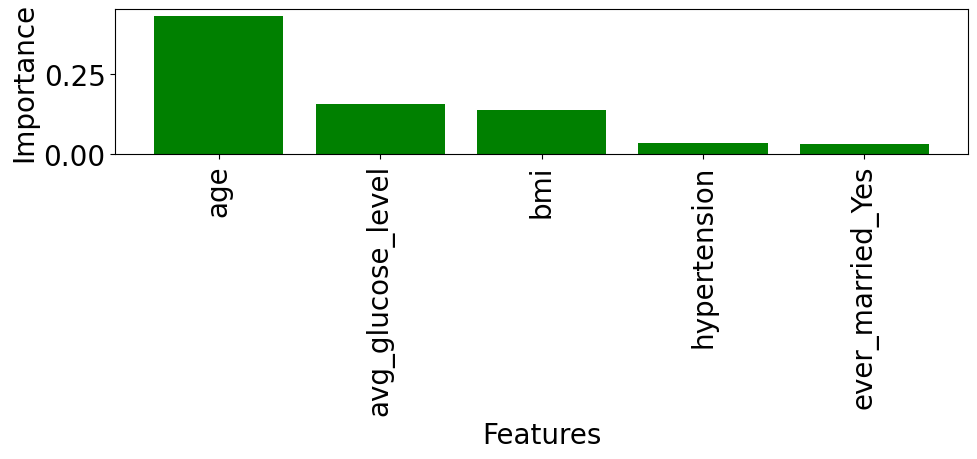

In [ ]:
# Create a figure
fig = plt.figure(figsize=(10, 5))

# The bar plot of the top 5 feature importance
plt.bar(df_fi_rfc['Features'][:5], df_fi_rfc['Importance'][:5], color='green')

# Set x-axis
plt.xlabel('Features')
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Importance')

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/stroke/figure/feature_importance_rfc.pdf')
plt.show()

                           Feature  Importance
0             Residence_type_Rural    0.076672
1                              bmi    0.035034
2                  ever_married_No    0.002354
3      smoking_status_never smoked    0.001605
4   smoking_status_formerly smoked    0.001108
5                      gender_Male    0.000817
6                 ever_married_Yes    0.000799
7             Residence_type_Urban    0.000402
8          work_type_Self-employed    0.000303
9                     gender_Other    0.000303
10                   heart_disease    0.000296
11              work_type_children    0.000201
12          work_type_Never_worked    0.000101
13                    hypertension    0.000000
14          smoking_status_Unknown   -0.000105
15                   gender_Female   -0.000307
16              work_type_Govt_job   -0.000307
17               work_type_Private   -0.000309
18           smoking_status_smokes   -0.001024
19                             age   -0.002791
20           

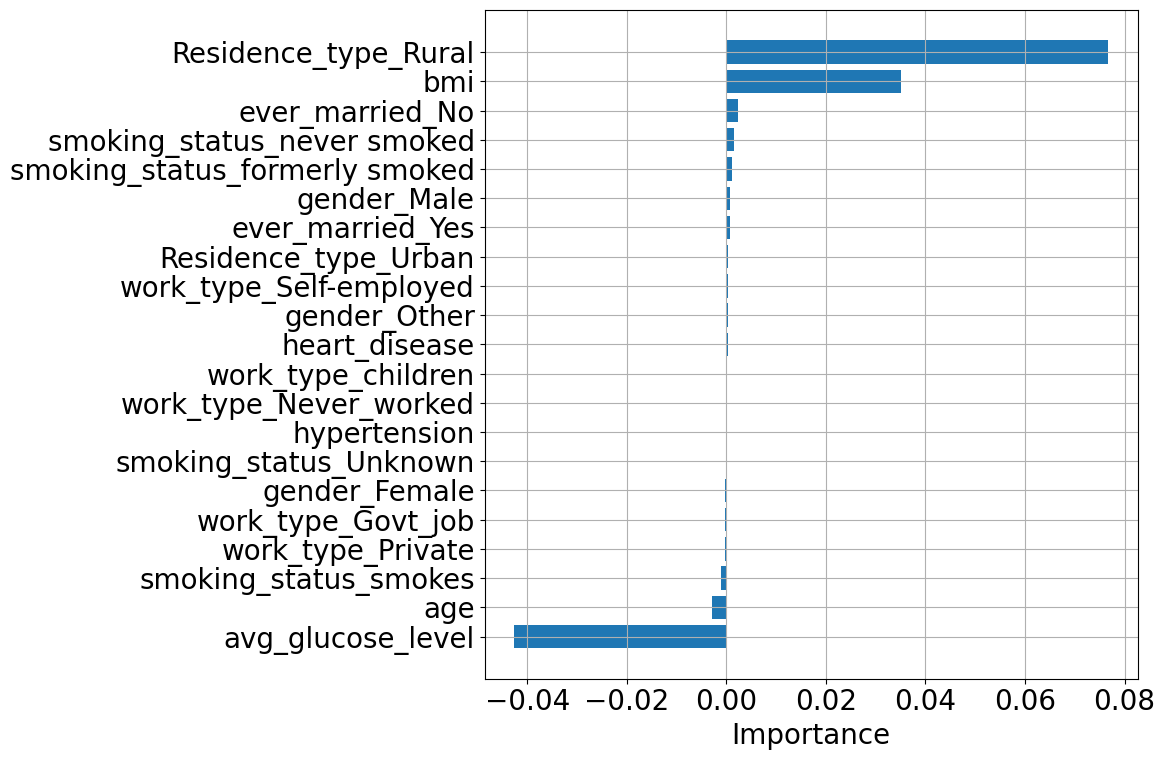

In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

best_mlp_model = best_score_params_estimator_gs[0][2]

feature_names = np.setdiff1d(df.columns, [target])


result = permutation_importance(best_mlp_model,X_test,  y_test,n_repeats=10,  random_state=42,scoring='f1_macro'  )

df_importance = pd.DataFrame({'Feature': feature_names,'Importance': result.importances_mean}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(df_importance)

plt.figure(figsize=(12, 8))
plt.barh(df_importance['Feature'], df_importance['Importance'])
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


# Exeprimentation and Discussion

In order to complete the goal of this project a machine learning pipeline was implemented in order to see what are the important factors in detecting a stroke. The dataset was first split into training and test data in order to ensure no data leakages. Then, extensive data preprocessing steps were taken in order to make sure the dataset was cleaned, standardized, and ready for analysis. This was done to ensure the validity of the results found through the project. After that, hyperparameter tuning took place to make sure all of the models in the project were optimized for analysis. This meant changing certain parameters for the different models being used for optimized results. The models used were MPLC, Hist Gradient Boosting, Decision Tree, and Logistic Regression. The models were then ran and evaluated with the bestscore values. The model with the best score was the MLPC with a score of 0.588873. The other scores were Hist Gradient Boosting with 0.573185, Decision Tree with 0.567478 and Logistic Regression with 0.523598. Then the interpretation of the results were done with the Feature Importance ranking of the Decision Tree and the permutation importance for the best model (MLPC). The visulization of the models showed some interesting results. The Decsion Tree feauture importance showed that age had the highest importance follwed by average glucose level and bmi. With lower importance values were hypertension and ever_married_yes. When conducting the permutation importance on the MLPC model, the variables that had the largest effect on the score were ResidenceType_Rural, bmi , and average glucose level. The differences between these two models in normal as they are two different types of models. The decsion tree was a tree based model and the MLPC was a permutation model. Having results from both of these models were effective in gaining a fuller insight into the results of what cause strokes.

# Conclusions

Some of the conclusions that I drew from this project was which factors in the dataset had links to increased risk of stroke. This was done in order to study which factors are important in predicitng if a patient will have a stroke.A machine learning pipeline was created in order to use different models to solve this research question. The results of this project visualized the results of 2 seperate models, mlpc and decsion tree. Although both of these models showed which features had a high importance in determining stroke, there were a couple of different variables highlighted. Both models determined age,bmi, and average glucose level were variables that had an effect on the stroke variable. This would lead me to conclude that these variables are good prediciting metrics into if a patient is likely to have a stroke. The MLPC model also showed that ResidenceType_Rural had a large effect on the score of that model but that did not seem to appear in the random forest modeling. This is normal since the two models use a different type of modelling to get the results. In conclusion, certain variables have a higher importance in determining if a patient will have a stroke than others. The common variables between the two models are age,bmi, and average glucose level which I hypothesize play the largest role in determining stroke chance. Furthur testing of this research question could include, studying a larger dataset that also tests stroke chance in patients that also has more variables. If these models show the same variables have importance in that dataset aswell, then it can be more confidently assumed which variables are important indicators in causing strokes.

Presentation Link

https://youtu.be/UgjxOKXplkg